In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Import my data from csv file
df=pd.read_csv('heart.csv',header=0)
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


# I WILL CHECK IF MY DATA IS CLEAN 

In [3]:
# i confirm that do not exist NaN in my dataframe if exists appear error with message
assert df.notnull().all().all(),"exists some NaN"

In [4]:
#I will check if the sex column has only with 0,1 values
#first way 

check1=(all((df.sex ==1)| (df.sex==0)))
print("The column has only the values that i want? ",check1)


The column has only the values that i want?  True


In [5]:
#I will check if the sex column has only with 0,1 values
#second way 
check2=df.sex.unique()# find the unique values of sex column
if ((check2[0]==1)|(check2[0]==0)|(check2[1]==1)|(check2[1]==0)):
    print("The columns contains only 0,1 values.")


The columns contains only 0,1 values.


In [6]:
#i will check the column of age contains only integers from 0 to 120
check_age=[]#define an empty variable
for age in df.age:
    if (age>0)&(age<120):
        check_age.append(1)
    else:
        check_age.append("PROBLEM MUST BE SOLVED")
if all (x ==1 for x in check_age):
    print("Clear the age column")

Clear the age column


In [7]:
#I will try to check for many columns with same in puts(function)
#0,1 values take the columns:sex fbs exang target
#returning YES must include only 0,1 values into the column,a lot of times exist values that dont related to my data for this reason i must check them!
def check3(col_name):
    uni=col_name.unique()
    if ((uni[0] == 1) | (uni[0] == 0) | (uni[1] == 1) | (uni[1] == 0)):
        return "YES"


In [8]:
# i run the function for the columns that must have values 0,1 to check if is TRUE
#the columns that must have 0,1 are sex,target,fbs,exang
print("Is the sex column clear? ",check3(df.sex))
print("Is the target column clear? ",check3(df.target))
print("Is the fbs column clear?",check3(df.fbs))
print("Is the exang column clear ?",check3(df.exang))


Is the sex column clear?  YES
Is the target column clear?  YES
Is the fbs column clear? YES
Is the exang column clear ? YES


In [9]:
# i will examinize some others columns with different way, with assert
#if the columns take some useless values the python appears a message 
assert ((df.thal==0) | (df.thal==1)|(df.thal==2)|(df.thal==3)).all(),"check this column"
assert ((df.cp==0) | (df.cp==1)|(df.cp==2)|(df.cp==3)).all(),"check this column"
assert ((df.restecg==0) | (df.restecg==1)|(df.restecg==2)).all(),"check this column"
assert ((df.slope==0) | (df.slope==1)|(df.slope==2)).all(),"check this column"


# MY DATA IS CLEAR AND READY FOR ANALYSIS

In [10]:
# informations about my DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
#columns names of my Dataframe
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
#observe some interest things from statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#i see the types of my columns
print(df.dtypes)



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


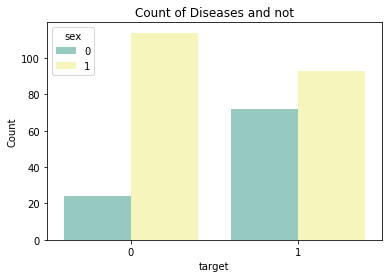

In [14]:
#count of target per gender
sns.countplot(df.target,hue=df.sex, palette="Set3")
plt.title("Count of Diseases and not")
plt.xlabel("target")
plt.ylabel("Count")
plt.show()


In [15]:
#i want to group the cholesterol to three parts.Low,natural,high
conditions=[(df.chol<200),
            (df.chol<239),
            (df.chol<1000)]
choices=['low','natural','High']

df.chol=np.select(conditions, choices)
df.chol.tail(5)

298       High
299       High
300        low
301        low
302    natural
Name: chol, dtype: object

In [16]:
#"chol" must become categorical variable

df.chol=df["chol"].astype("category")
df.dtypes #Observe that tranform to categorical columns


age            int64
sex            int64
cp             int64
trestbps       int64
chol        category
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
target         int64
dtype: object

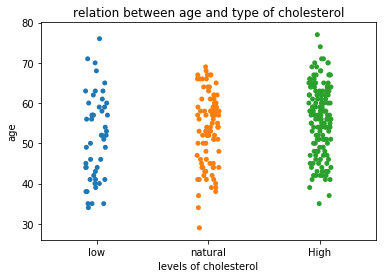

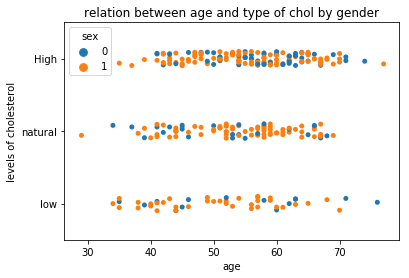

In [17]:
#relationship between  age and level of cholesterin

sns.stripplot(x="chol", y="age",order=["low","natural","High"],data=df)
plt.ylabel("age")
plt.xlabel("levels of cholesterol")
plt.title('relation between age and type of cholesterol')
plt.show()
#with hue seperate famales=0 and males=1
sns.stripplot(x="age",y="chol",data=df,order=["High","natural","low"],hue='sex')
plt.ylabel('levels of cholesterol')
plt.xlabel("age")
plt.title("relation between age and type of chol by gender")
plt.show()


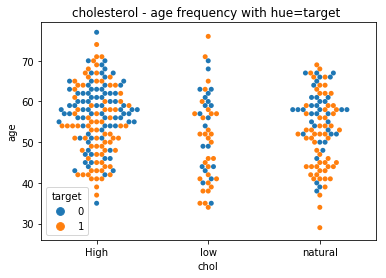

In [18]:
#I use swarmplot to observe how many for each age and level of chol will have target=1(disease) or target=0(not disease)
sns.swarmplot(x="chol",y="age",data=df,hue="target")
plt.title("cholesterol - age frequency with hue=target ")
plt.show()
#for this plot we can figure out that the most of people have high levels of cholesterin ,then natural and low
#as well people with high chol and age between 40-55 huge percent have heart disease
#and the people 55 and above with high chol dont have heart disease.For me is a little strangle this output



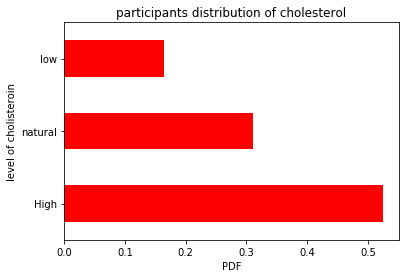

In [19]:
# I will find the probability of the three stages of cholesterin

(df.chol.value_counts(normalize=True)).plot(kind='barh',color='red')
plt.ylabel('level of cholisteroin')
plt.xlabel('PDF')
plt.title('participants distribution of cholesterol')# i see that about the 50% have high holisterin
plt.show()
#observe that the 50% of the participants to survey have high levels of cholesterol

In [20]:
#creation one pivot table(because have duplicate data) with values the mean of age for each "fbs" and "sex"
print(df.fbs.value_counts())
piv=df.pivot_table(index="fbs",columns="sex",values="age",aggfunc="mean")
piv



0    258
1     45
Name: fbs, dtype: int64


sex,0,1
fbs,,
0,55.238095,53.264368
1,58.750000,56.363636


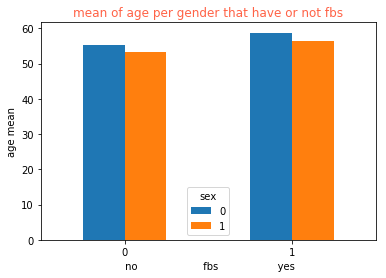

In [21]:
#the plot of the pivot table from above
piv.plot(kind="bar",rot=0)
plt.ylabel("age mean")
plt.xlabel(" no                     fbs                   yes")
plt.title("mean of age per gender that have or not fbs",color="tomato")
plt.show()

0    204
1     99
Name: exang, dtype: int64


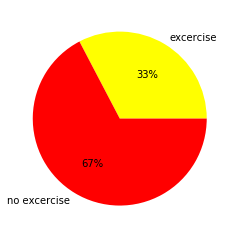

In [22]:
#create a pie chart with percentage of exercise or not("exang")
print(df.exang.value_counts())
labels=["excercise","no excercise"]
colors=["yellow","red"]
values=[df.exang.value_counts()[1],df.exang.value_counts()[0]]
plt.pie(values,labels=labels,colors=colors,autopct="%.lf%%")
plt.show()


In [23]:
#i will show the relation between chol and exercise(1:yes  0:no)
cross=pd.crosstab(df.chol,df.exang,normalize=True)#the result is probability
print(cross)
#Now is clear that if someone work out  have less probability to have high level chol
#low levels of holesterol must be more for people who work out , but dont happend ,the main reason is that only the 33% have exercised

exang           0         1
chol                       
High     0.326733  0.198020
low      0.122112  0.042904
natural  0.224422  0.085809


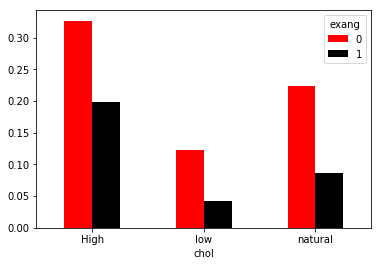

In [24]:
#plot bar  the above
cross.plot(kind="bar",rot=0,color=["red","black"])
plt.show()


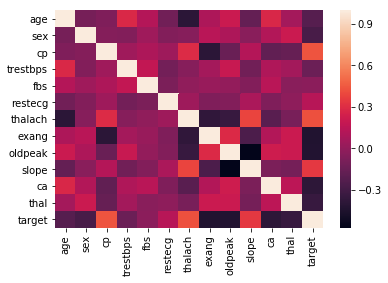

In [25]:
#corelation between all
sns.heatmap(df.corr())
plt.show()


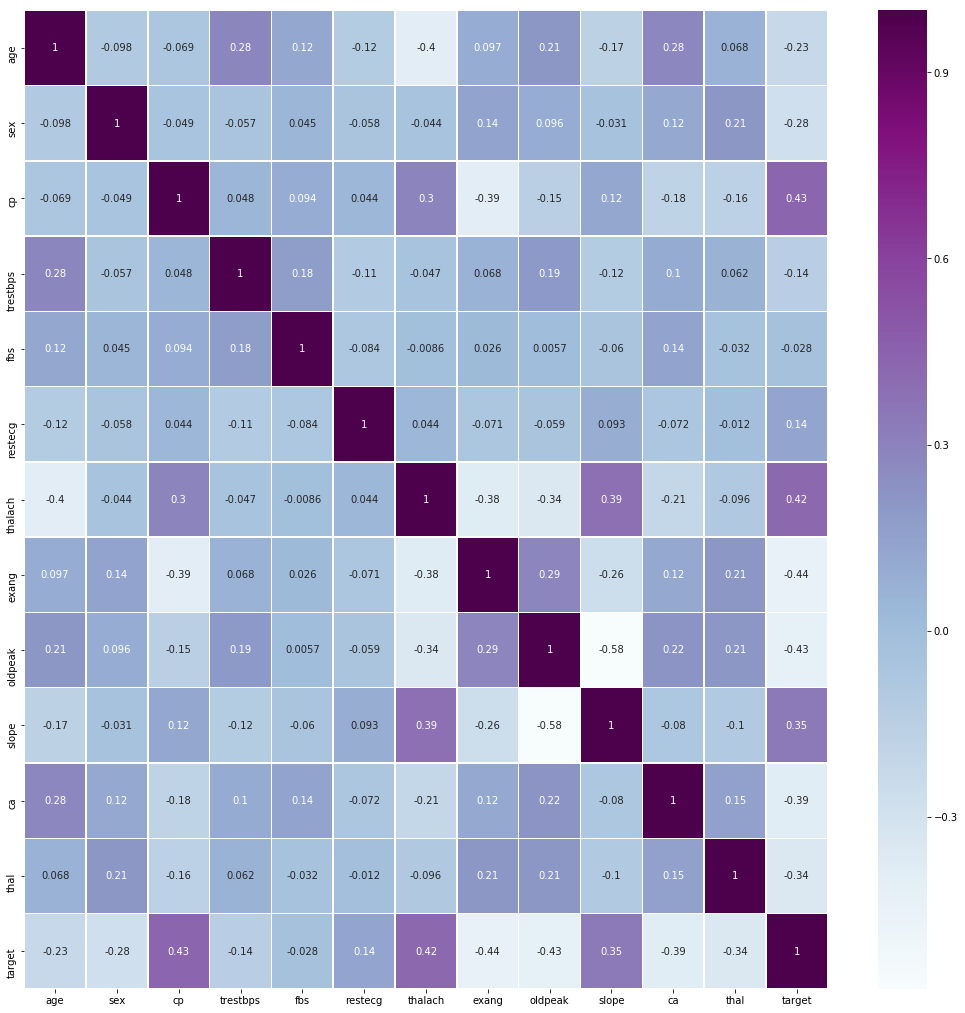

In [26]:
#the same but with correlation values and other background
zf,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="BuPu", ax=ax)
plt.show()

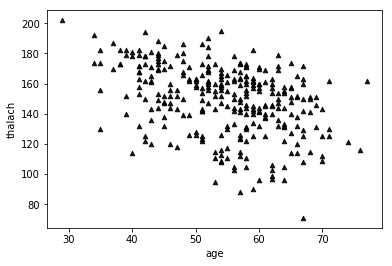

In [27]:
# see the scatter plot  and observe that "thalach" is higher for younger people
df.plot(x="age",y="thalach",kind="scatter", c="black", marker='^',alpha= 0.9)
plt.show()


In [28]:
#I will find for each cp all the others column's mean
df_m=df.groupby("cp").mean()
df_m

,age,sex,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
cp,,,,,,,,,,,,
0,55.692308,0.727273,132.020979,0.125874,0.475524,140.538462,0.559441,1.383217,1.258741,0.965035,2.447552,0.272727
1,51.360000,0.640000,128.400000,0.100000,0.620000,162.420000,0.080000,0.316000,1.680000,0.420000,2.140000,0.820000
2,53.517241,0.597701,130.379310,0.195402,0.597701,155.609195,0.126437,0.797701,1.505747,0.586207,2.206897,0.793103
3,55.869565,0.826087,140.869565,0.217391,0.391304,155.956522,0.173913,1.391304,1.260870,0.478261,2.260870,0.695652


In [29]:
#i will  keep only some of the columns 
df_m=df_m[["age","trestbps"]]
df_m

,age,trestbps
cp,,
0,55.692308,132.020979
1,51.360000,128.400000
2,53.517241,130.379310
3,55.869565,140.869565


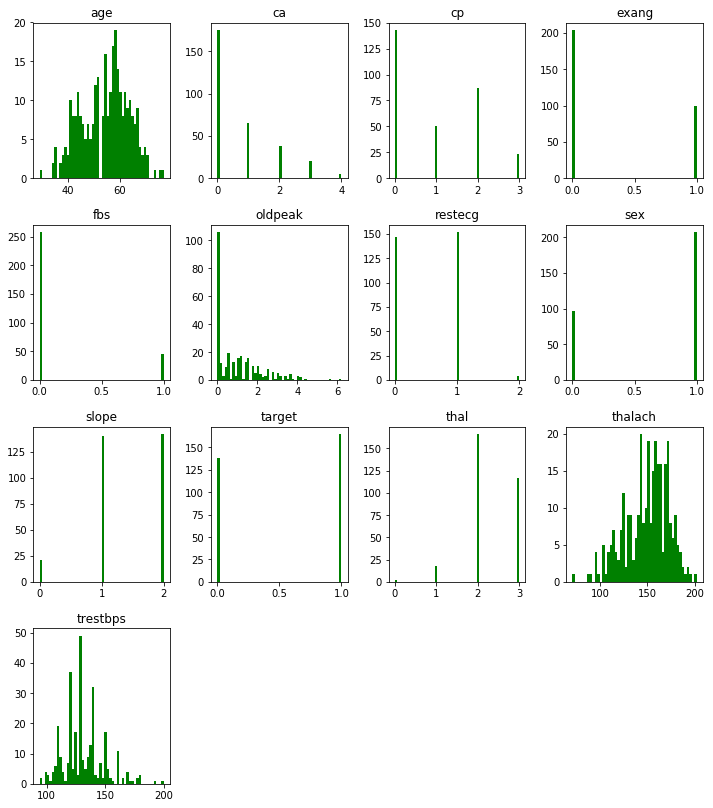

In [30]:
#frequency of all my data
df.hist(bins=50, figsize=(12,14), color= "green", grid=False)
plt.show()

In [31]:
#i will create a Data_Frame that have the mean of "trestbps" per "age"
df_new=df.groupby("age").mean()
df_new.tail(10)

,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,
65,0.500000,1.125000,138.500000,0.250000,0.250000,146.125000,0.000000,1.075000,1.625000,1.000000,2.250000,0.500000
66,0.571429,0.857143,146.571429,0.142857,0.428571,138.857143,0.428571,0.914286,1.142857,1.000000,1.857143,0.571429
67,0.666667,0.666667,127.777778,0.111111,0.444444,135.555556,0.333333,0.988889,1.222222,1.333333,2.444444,0.333333
68,0.750000,1.500000,140.500000,0.500000,0.500000,139.250000,0.250000,1.875000,1.250000,0.750000,2.750000,0.500000
69,0.666667,2.666667,146.666667,0.333333,0.333333,142.666667,0.000000,1.300000,1.333333,2.000000,2.333333,0.666667
70,1.000000,0.750000,147.750000,0.000000,0.500000,122.250000,0.500000,1.975000,1.000000,1.000000,2.500000,0.250000
71,0.000000,1.000000,127.333333,0.333333,0.666667,139.000000,0.000000,0.666667,1.666667,1.000000,2.000000,1.000000
74,0.000000,1.000000,120.000000,0.000000,0.000000,121.000000,1.000000,0.200000,2.000000,1.000000,2.000000,1.000000
76,0.000000,2.000000,140.000000,0.000000,2.000000,116.000000,0.000000,1.100000,1.000000,0.000000,2.000000,1.000000


In [32]:
# i will keep only the columns that i am intersted in
df_new=df_new[["trestbps","thalach"]]
df_new.head(4)

,trestbps,thalach
age,,
29,130.0,202.0
34,118.0,183.0
35,126.5,160.5
37,125.0,178.5


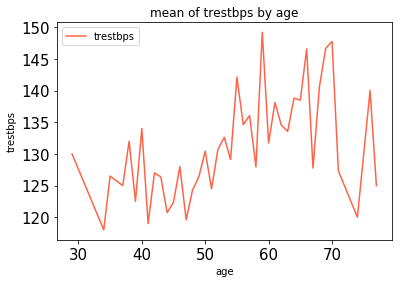

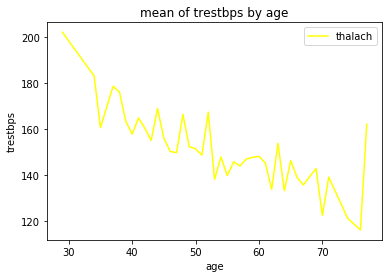

In [33]:
# plot now.. i will plot and the mean of "trestbps" for each age
#1
df_new.plot(kind="line",use_index=True,y="trestbps",fontsize=15,c="tomato")
plt.ylabel("trestbps")
plt.xlabel("age")
plt.title("mean of trestbps by age")
# i will plot and the mean of "thalach" for each age
df_new.plot(kind="line",use_index=True,y="thalach",c="yellow")
plt.legend(loc="upper right") 
plt.ylabel("trestbps")
plt.xlabel("age")
plt.title("mean of trestbps by age")
plt.show()

#It is clear for the first plot that when a person become older the trestbps(something like blood pressure) increase ,in age approximately 68 years old havw one huge reduce 


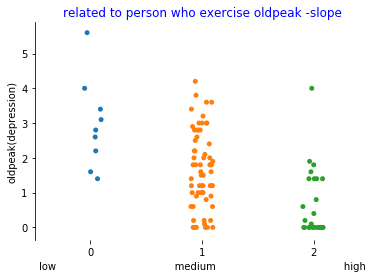

In [34]:
#takes the data for the people that work out ..exang=1 (true)
#I examine the people who exercised and their oldpeakand slope
df_ex=df[df.exang==1]
df_ex.oldpeak.head(5)
sns.stripplot(x="slope",y="oldpeak",data=df_ex)
plt.title("related to person who exercise oldpeak -slope",color="blue")
plt.xlabel("low                                      medium                                         high")
plt.ylabel("oldpeak(depression)")
sns.despine(bottom = True)#remove the x-axis
plt.show()

#persons who exercised hard(slope high) dont have depression

Text(0.5, 1.0, 'Age  for different types of chest pain')

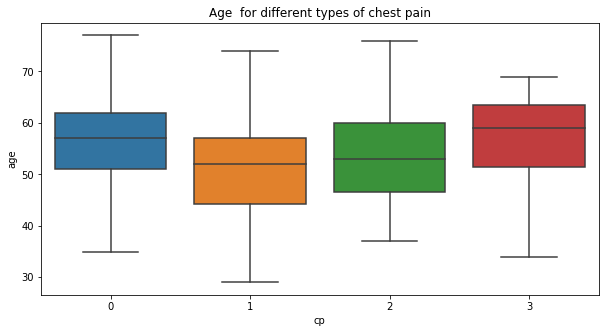

In [35]:
#Age  for different types of chest pain BOXPLOT
plt.figure(figsize = (10,5))
plot = sns.boxplot(x = "cp", y = "age", data = df)
plot.set_title("Age  for different types of chest pain")



C:\Users\jim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


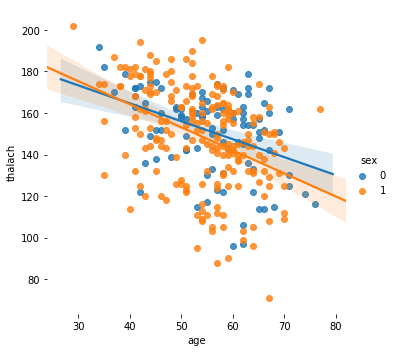

In [36]:
#regression "thalach" and "age"
g = sns.lmplot(x="age", y="thalach", hue="sex", data=df)
sns.despine(left= True,bottom = True)#without axis


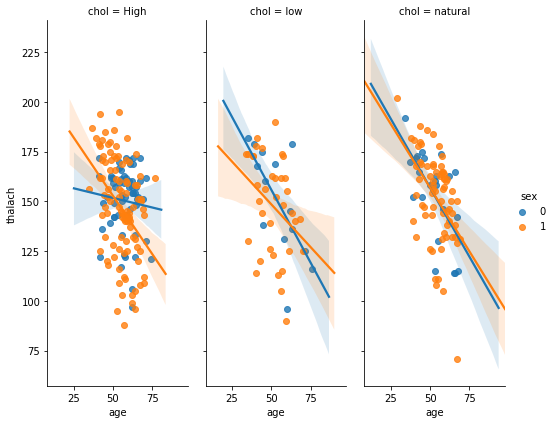

In [37]:
#regression for all types of cholesterol
sns.lmplot(x="age", y="thalach", hue="sex", col="chol",data=df, height=6, aspect=.4, x_jitter=.1)
